In [1]:
import csv
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

In [2]:
#Planets Parameters filtered by this query:
# period:day <= 20 AND  axis:au < 1 

In [3]:
# Loading my data frame
#my database
df = pd.read_table("/home/faezeh/0Parvin/The_Whole_Cat.csv", delimiter =',')
df.head(5)

mag planet_status  mass  mass_error_min  \
0                       11 Com b     Confirmed   NaN             NaN   
1                       11 Oph b     Confirmed  21.0             3.0   
2                       11 UMi b     Confirmed   NaN             NaN   
3                       14 And b     Confirmed   NaN             NaN   
4  dec.append(df["dec"].iloc[i])     Confirmed   9.1             NaN   

   mass_error_max  mass_sini  mass_sini_error_min  mass_sini_error_max  \
0             NaN    16.1284                 1.50                 1.50   
1             3.0        NaN                  NaN                  NaN   
2             NaN    11.0873                 1.10                 1.10   
3             NaN     4.6840                 0.23                 0.23   
4             NaN     5.2150                  NaN                  NaN   

   radius  radius_error_min  ...  star_sp_type  star_age  star_age_error_min  \
0     NaN               NaN  ...        G8 III       NaN                 NaN   
1     NaN               NaN  ...            M9     0.011               0.002   
2     NaN               NaN  ...         K4III     1.560               0.540   
3     NaN               NaN  ...         K0III       NaN                 NaN   
4     NaN               NaN  ...          K0 V     5.100                 NaN   

   star_age_error_max  star_teff  star_teff_error_min  star_teff_error_max  \
0                 NaN     4742.0                100.0                100.0   
1               0.002     2375.0                175.0                175.0   
2               0.540     4340.0                 70.0                 70.0   
3                 NaN     4813.0                 20.0                 20.0   
4                 NaN     5311.0                 87.0                 87.0   

   star_detected_disc  star_magnetic_field    star_alternate_names  
0                 NaN                  NaN                     NaN  
1                 NaN                  NaN  Oph 1622-2405, Oph 11A  
2                 NaN                  NaN                     NaN  
3                 NaN                  NaN                     NaN  
4                 NaN                  NaN                     NaN  

[5 rows x 98 columns]

In [4]:
len(df)

5108

In [5]:
number=0
for i in range(len(df)):
    if pd.notnull(df["star_age"].iloc[i]):
        number=number+1
print(number)        

2792


In [6]:
#Nasa database
df1 = pd.read_table("/home/faezeh/0Parvin/NASA_Cat.csv", delimiter =',')
df1

/tmp/ipykernel_4568/3534050686.py:2: DtypeWarning: Columns (11,68,74,76) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_table("/home/faezeh/0Parvin/NASA_Cat.csv", delimiter =',')


pl_name hostname  default_flag  sy_snum  sy_pnum  discoverymethod  \
0       11 Com b   11 Com             1        2        1  Radial Velocity   
1       11 Com b   11 Com             0        2        1  Radial Velocity   
2       11 UMi b   11 UMi             0        1        1  Radial Velocity   
3       11 UMi b   11 UMi             1        1        1  Radial Velocity   
4       11 UMi b   11 UMi             0        1        1  Radial Velocity   
...          ...      ...           ...      ...      ...              ...   
30090  ups And d  ups And             0        2        3  Radial Velocity   
30091  ups And d  ups And             0        2        3  Radial Velocity   
30092  ups Leo b  ups Leo             1        1        1  Radial Velocity   
30093   xi Aql b   xi Aql             0        1        1  Radial Velocity   
30094   xi Aql b   xi Aql             1        1        1  Radial Velocity   

       disc_year                           disc_facility              soltype  \
0           2007                        Xinglong Station  Published Confirmed   
1           2007                        Xinglong Station  Published Confirmed   
2           2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   
3           2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   
4           2009  Thueringer Landessternwarte Tautenburg  Published Confirmed   
...          ...                                     ...                  ...   
30090       1999                  Multiple Observatories  Published Confirmed   
30091       1999                  Multiple Observatories  Published Confirmed   
30092       2021       Okayama Astrophysical Observatory  Published Confirmed   
30093       2007       Okayama Astrophysical Observatory  Published Confirmed   
30094       2007       Okayama Astrophysical Observatory  Published Confirmed   

       pl_controv_flag  ... sy_vmagerr2 sy_kmag  sy_kmagerr1  sy_kmagerr2  \
0                    0  ...      -0.023   2.282        0.346       -0.346   
1                    0  ...      -0.023   2.282        0.346       -0.346   
2                    0  ...      -0.005   1.939        0.270       -0.270   
3                    0  ...      -0.005   1.939        0.270       -0.270   
4                    0  ...      -0.005   1.939        0.270       -0.270   
...                ...  ...         ...     ...          ...          ...   
30090                0  ...      -0.023   2.859        0.274       -0.274   
30091                0  ...      -0.023   2.859        0.274       -0.274   
30092                0  ...      -0.023   2.184        0.248       -0.248   
30093                0  ...      -0.023   2.171        0.220       -0.220   
30094                0  ...      -0.023   2.171        0.220       -0.220   

       sy_gaiamag  sy_gaiamagerr1  sy_gaiamagerr2   rowupdate  pl_pubdate  \
0         4.44038        0.003848       -0.003848  2014-05-14     2008-01   
1         4.44038        0.003848       -0.003848  2014-07-23     2011-08   
2         4.56216        0.003903       -0.003903  2018-04-25     2011-08   
3         4.56216        0.003903       -0.003903  2018-09-04     2017-03   
4         4.56216        0.003903       -0.003903  2018-04-25     2009-10   
...           ...             ...             ...         ...         ...   
30090     3.98687        0.008937       -0.008937  2014-09-18     2007-01   
30091     3.98687        0.008937       -0.008937  2014-08-21     2004-01   
30092     4.03040        0.008513       -0.008513  2022-01-10     2021-12   
30093     4.42501        0.003837       -0.003837  2014-07-23     2011-08   
30094     4.42501        0.003837       -0.003837  2014-05-14     2008-06   

       releasedate  
0       2014-05-14  
1       2014-07-23  
2       2014-07-23  
3       2018-09-06  
4       2014-05-14  
...            ...  
30090   2014-09-18  
30091   2014-08-21  
30092   2022-01-10  
30093   2014-07-23  
30094   2014-05-14

In [11]:
#Metric of Selection:
#for STAR:
T= df["star_age"]
#print("T",T[0])
D= df["star_distance"]
#for PLANET:
M= df["star_mass"]
a= df["semi_major_axis"]
R= df["radius"]
MoS=[]

#formula:
MoS= ((1/T)*(1/D**2))*(M/a**3)*R**2;

for i in range(len(df)):
    if pd.notnull(MoS[i]):
        print(MoS[i], sep = "\n")

2.5383423381048836e-10
9.119907079090755e-05
32.97049663408971
5.357691294990248
134.96212451055288
17.417511992263872
5.806970656941705e-05
1.8495023489610764e-12
0.5926141214480959
3.040704387743012e-14
0.0019971774389167464
0.05026926048458021
0.004142155536491776
0.0022867362252708963
0.009044431205833111
0.001341019218831267
0.001219470992633257
0.004527156764866586
0.007244919894855194
0.00023134158484959793
0.0047267455933670335
0.0001424984056122449
4.7268664511479997e-05
0.001266155803715075
0.0004957685376122972
0.0011918312869300238
0.005060642184734193
0.011658445513599324
0.000600229515520033
0.0005874038503108669
0.013234528619765724
0.1001616908643963
0.00263209983928377
1.5329642237591323e-05
6.338232074610358
0.00024661930604279815
0.0006974775434678741
0.009680654579623643
0.005386270176086169
0.008861853651744446
0.021557375822992962
0.7324435076130913
3.1513141057176166
0.005641248577568526
0.014148522247795042
1.0500686780781057
0.0018571495544591633
7.776012936048

In [8]:
type(df1["pl_pubdate"])

pandas.core.series.Series

In [9]:
for i in range(len(df1)):
    print(df1["pl_pubdate"].iloc[i])

2008-01
2011-08
2011-08
2017-03
2009-10
2011-08
2008-12
2021-05
2003-01
2008-04
2006-07
2007-01
2017-03
2004-01
1997-07
2017-03
2007-01
2006-07
2021-05
2007-09
2020-12
2008-06
2011-08
2015-03
2015-03
2010-08
2008-12
2018-08
2011-01
2011-01
2021-10
2013-05
2015-05
2013-09
2015-06
2010-05
2004-10
2008-01
2022-04
2015-05
2010-03
2017-01
2015-11
2009-12
2017-03
2007-09
2009-06
2007-01
2004-01
2021-05
2009-05
2007-01
2021-05
2021-05
2015-11
2015-00
2019-04
2021-05
2015-04
2004-01
2006-07
1995-11
2021-05
2015-04
2004-01
2004-10
2014-06
2015-01
2002-12
1997-01
2008-03
2018-10
2012-11
2009-03
2018-10
2008-03
2021-05
2012-11
2014-06
2015-01
2004-10
2009-03
2014-06
2018-10
2012-11
2015-01
2008-03
2002-12
2021-05
2009-03
2004-10
2004-01
2009-03
2020-07
2004-10
2016-01
2011-09
2015-01
2014-06
2011-08
2012-11
2016-04
2021-05
2018-10
2019-09
2014-06
2009-03
2018-10
2008-03
2012-11
2015-01
2021-05
2019-04
2010-01
2008-12
2021-05
2010-01
2010-01
2021-05
2010-01
2016-01
2019-11
2011-12
2019-11
2019-04


In [10]:
D[10]

145.0

In [11]:
df1["pl_name"].iloc[0]

'11 Com b'

In [12]:
len(df1)

30095

In [13]:
df1["pl_name"].iloc[4]

'11 UMi b'

In [14]:
df1["pl_pubdate"].iloc[1]

'2011-08'

In [15]:
x = df1["pl_pubdate"].iloc[3]
print(x)
x1 = x.translate({ord('-'): None})
print(x1)
print(type(x1))

2017-03
201703
<class 'str'>


In [16]:
x=int(x1)
print(type(x))

<class 'int'>


In [17]:
df1["pl_pubdate"].iloc[0] > df1["pl_pubdate"].iloc[1] 

False

In [18]:
#define a empty datframe
Name=[]
T=[]
Dist=[]
Mass=[]
Orbsmax=[]
Radj=[]
pudate=[]

k=0

df2 = pd.DataFrame()
for i in range(len(df1)):
    for j in range(len(df)):
        if df1["pl_name"].iloc[i] == df["name"].iloc[j] and pd.notnull(df["star_age"].iloc[j]):
            if k==0:
                Name.append(df1["pl_name"].iloc[i])
                T.append(df["star_age"].iloc[j])
                Dist.append(df1["sy_dist"].iloc[i])
                Mass.append(df1["st_mass"].iloc[i])
                Orbsmax.append(df1["pl_orbsmax"].iloc[i])
                Radj.append(df1["pl_radj"].iloc[i])
                pudate.append(df1["pl_pubdate"].iloc[i])
                k=k+1
                
            elif k>=1 and df1["pl_name"].iloc[i] == Name[k-1]:
                d1=df1["pl_pubdate"].iloc[1]
                D1=d1.translate({ord('-'): None})
                D1=int(D1)
                d2=pudate[k-1]
                D2=d2.translate({ord('-'): None})
                D2=int(D2)
                if D1 > D2:
                    T[k-1]=df["star_age"].iloc[j]
                    Name[k-1]=df1["pl_name"].iloc[i]
                    Dist[k-1]=df1["sy_dist"].iloc[i]
                    Mass[k-1]=df1["st_mass"].iloc[i]
                    Orbsmax[k-1]=df1["pl_orbsmax"].iloc[i]
                    Radj[k-1]=df1["pl_radj"].iloc[i]
                    pudate[k-1]=df1["pl_pubdate"].iloc[i]
                elif D1 < D2:
                    break
    
                    
            elif k>=1 and df1["pl_name"].iloc[i] != Name[k-1]:
                Name.append(df1["pl_name"].iloc[i])
                T.append(df["star_age"].iloc[j])
                Dist.append(df1["sy_dist"].iloc[i])
                Mass.append(df1["st_mass"].iloc[i])
                Orbsmax.append(df1["pl_orbsmax"].iloc[i])
                Radj.append(df1["pl_radj"].iloc[i])
                pudate.append(df1["pl_pubdate"].iloc[i])
                k=k+1

In [19]:
Name

['11 UMi b',
 '14 Her b',
 '16 Cyg B b',
 '17 Sco b',
 '24 Boo b',
 '24 Sex b',
 '24 Sex c',
 '2M0437 b',
 '2MASS J01225093-2439505 b',
 '51 Eri b',
 '51 Peg b',
 '55 Cnc b',
 '55 Cnc c',
 '55 Cnc d',
 '55 Cnc e',
 '55 Cnc f',
 '61 Vir b',
 '61 Vir c',
 '61 Vir d',
 '70 Vir b',
 '91 Aqr b',
 'AB Aur b',
 'AB Pic b',
 'AU Mic b',
 'AU Mic c',
 'BD+03 2562 b',
 'BD+15 2375 b',
 'BD+15 2940 b',
 'BD+20 594 b',
 'BD+49 828 b',
 'BD+60 1417 b',
 'BD-06 1339 c',
 'BD-08 2823 b',
 'BD-10 3166 b',
 'BD-11 4672 b',
 'BD-11 4672 c',
 'BD-17 63 b',
 'CD Cet b',
 'CHXR 73 b',
 'CI Tau b',
 'COCONUTS-2 b',
 'CT Cha b',
 'CoRoT-10 b',
 'CoRoT-11 b',
 'CoRoT-12 b',
 'CoRoT-13 b',
 'CoRoT-14 b',
 'CoRoT-16 b',
 'CoRoT-17 b',
 'CoRoT-19 b',
 'CoRoT-20 b',
 'CoRoT-20 c',
 'CoRoT-21 b',
 'CoRoT-22 b',
 'CoRoT-23 b',
 'CoRoT-24 b',
 'CoRoT-24 c',
 'CoRoT-25 b',
 'CoRoT-26 b',
 'CoRoT-27 b',
 'CoRoT-28 b',
 'CoRoT-29 b',
 'CoRoT-3 b',
 'CoRoT-4 b',
 'CoRoT-5 b',
 'CoRoT-7 b',
 'CoRoT-7 c',
 'CoRoT-8 b',
 '

In [20]:
print(T)
print(Dist)
print(Mass)
print(Orbsmax)
print(Radj)
print(pudate)

[1.56, 5.1, 8.0, 5.13, 6.92, 2.7, 2.7, 0.0025, 0.12, 0.02, 4.0, 10.2, 10.2, 10.2, 10.2, 10.2, 8.96, 8.96, 8.96, 7.09, 3.56, 0.002, 0.03, 0.022, 0.022, 5.25, 7.4, 7.1, 3.34, 2.3, 0.1, 4.4, 4.5, 4.18, 4.4, 4.4, 4.3, 3.0, 0.002, 0.002, 0.475, 0.002, 3.0, 2.0, 6.3, 1.64, 4.2, 6.73, 10.7, 5.0, 0.1, 0.1, 4.1, 3.3, 7.2, 11.0, 11.0, 5.2, 8.6, 4.21, 12.0, 4.5, 2.0, 1.0, 6.9, 1.5, 1.5, 3.0, 4.0, 1.0, 0.001, 0.04, 3.99, 3.09, 0.001, 9.9, 7.0, 7.0, 7.0, 5.0, 5.0, 6.0, 3.8, 3.0, 3.0, 3.0, 8.77, 1.6, 12.4, 12.4, 6.9, 6.0, 0.16, 8.0, 8.0, 8.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.55, 2.03, 2.5, 2.5, 2.5, 2.5, 8.9, 0.27, 0.001, 0.1, 3.6, 6.5, 6.5, 2.5, 5.0, 5.0, 1.3, 6.8, 2.0, 7.8, 7.8, 12.4, 8.8, 2.7, 6.7, 10.2, 12.4, 4.0, 2.8, 3.2, 9.0, 4.4, 6.1, 2.2, 1.6, 1.0, 3.17, 3.8, 2.4, 1.7, 3.5, 6.6, 3.6, 10.1, 2.0, 4.2, 2.7, 2.2, 5.1, 5.7, 8.9, 8.9, 2.0, 2.5, 1.5, 1.7, 3.37, 8.2, 9.4, 4.67, 3.9, 4.2, 2.01, 1.0, 7.11, 7.3, 2.3, 2.765, 2.6, 8.1, 9.0, 2.88, 5.46, 4.66, 1.24, 11.1, 1.27, 2.07, 0.6, 3.4, 1.6, 6.0, 3.3, 7.

In [21]:
df2["pl_name"] = Name
df2["star_age"] = T
df2["sy_dist"] =Dist
df2["st_mass"] = Mass
df2["pl_orbsmax"] = Orbsmax
df2["pl_radj"] = Radj

In [27]:
print(df2)

         pl_name  star_age    sy_dist  st_mass  pl_orbsmax  pl_radj
0       11 UMi b      1.56  125.32100     1.70     1.51000      NaN
1       14 Her b      5.10   17.93230     0.97     2.83000      NaN
2     16 Cyg B b      8.00   21.13970     1.08     1.66000      NaN
3       17 Sco b      5.13  124.95300     1.22     1.45000      NaN
4       24 Boo b      6.92   95.98630     0.99     0.19000      NaN
...          ...       ...        ...      ...         ...      ...
2477   tau Cet h      5.80    3.60304     0.78     0.24300      NaN
2478   tau Gem b      1.22  112.53700     2.30     1.17000      NaN
2479   ups And b      3.80   13.40540     1.29     0.05914      NaN
2480   ups And c      3.80   13.40540     1.29     0.82650      NaN
2481   ups And d      3.80   13.40540     1.29     2.51700      NaN

[2482 rows x 6 columns]


In [44]:
dffinal = pd.DataFrame()
Name1=[]
dec1=[]
mag1=[]
T1=[]
Dist1=[]
Mass1=[]
Orbsmax1=[]
Radj1=[]

for i in range(len(df)):
    if pd.notnull(df["star_age"].iloc[i]):
        if pd.notnull(df["star_distance"].iloc[i]) and pd.notnull(df["star_mass"].iloc[i]) and pd.notnull(df["semi_major_axis"].iloc[i]) and pd.notnull(df["radius"].iloc[i]):
                        Name1.append(df["name"].iloc[i])
                        dec1.append(df["dec"].iloc[i])
                        mag1.append(df["mag_v"].iloc[i])
                        T1.append(df["star_age"].iloc[i])
                        Dist1.append(df["star_distance"].iloc[i])
                        Mass1.append(df["star_mass"].iloc[i])
                        Orbsmax1.append(df["semi_major_axis"].iloc[i])
                        Radj1.append(df["radius"].iloc[i])
        elif pd.isna(df["star_distance"].iloc[i]) or pd.isna(df["star_mass"].iloc[i]) or pd.isna(df["semi_major_axis"].iloc[i]) or pd.isna(df["radius"].iloc[i]):
            for j in range(len(df2)):
                if df["name"].iloc[i] == df2["pl_name"].iloc[j]:
                    if pd.isna(df["star_distance"].iloc[i]) and pd.notnull(df2["sy_dist"].iloc[j]):
                        df["star_distance"].iloc[i]=df2["sy_dist"].iloc[j]
                    elif pd.isna(df["star_mass"].iloc[i]) and pd.notnull(df2["st_mass"].iloc[j]):
                        df["star_mass"].iloc[i]=df2["st_mass"].iloc[j]
                    elif pd.isna(df["semi_major_axis"].iloc[i]) and pd.notnull(df2["pl_orbsmax"].iloc[j]):
                        df["semi_major_axis"].iloc[i]=df2["pl_orbsmax"].iloc[j]
                    elif pd.isna(df["radius"].iloc[i]) and pd.notnull(df2["pl_radj"] .iloc[j]):
                        df["radius"].iloc[i]=df2["pl_radj"] .iloc[j]
                    if pd.notnull(df["star_distance"].iloc[i]) and pd.notnull(df["star_mass"].iloc[i]) and pd.notnull(df["semi_major_axis"].iloc[i]) and pd.notnull(df["radius"].iloc[i]):
                        Name1.append(df["name"].iloc[i])
                        dec1.append(df["dec"].iloc[i])
                        mag1.append(df["mag_v"].iloc[i])
                        T1.append(df["star_age"].iloc[i])
                        Dist1.append(df["star_distance"].iloc[i])
                        Mass1.append(df["star_mass"].iloc[i])
                        Orbsmax1.append(df["semi_major_axis"].iloc[i])
                        Radj1.append(df["radius"].iloc[i]) 
        else:
            break

In [45]:
dffinal["name"] = Name3
dffinal["star_age"]=T3
dffinal["dec"] = dec
dffinal["mag_v"]=mag
dffinal["star_distance"] =Dist3
dffinal["star_mass"] = Mass3
dffinal["semi_major_axis"] = Orbsmax3
dffinal["radius"] = Radj3

In [46]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,):
    print(dffinal)

                           name  star_age     dec   mag_v  star_distance  \
0                   1RXS 1609 b     0.011 -21.083     NaN        145.000   
1     2MASS J01225093-2439505 b     0.120 -24.664     NaN         36.000   
2                      51 Eri b     0.020  -2.474   5.223         29.400   
3                      51 Peg b     4.000  20.769   5.490         14.700   
4                      55 Cnc e    10.200  28.334   5.950         12.340   
5                      AU Mic b     0.022 -31.341   8.600          9.790   
6                      AU Mic c     0.022 -31.341   8.600          9.790   
7                   BD+20 594 b     3.340  20.599  11.000        180.390   
8                  BD+60 1417 b     0.100  69.014     NaN         44.957   
9                  BD-10 3166 b     4.180 -10.770  10.080         66.000   
10                 COCONUTS-2 b     0.475 -76.702  11.300         10.890   
11                   CoRoT-10 b     3.000   0.746  15.220        345.000   
12          

In [47]:
#Metric of Selection:
#for STAR:
T= dffinal["star_age"]
#print("T",T[0])
D= dffinal["star_distance"]
#for PLANET:
M= dffinal["star_mass"]
a= dffinal["semi_major_axis"]
R= dffinal["radius"]
MoS=[]

#formula:
MoS= ((1/T)*(1/D**2))*(M/a**3)*R**2;

for i in range(len(dffinal)):
    print(i,"\t",MoS[i])

0 	 2.5383423381048836e-10
1 	 1.8292106145492077e-08
2 	 9.119907079090755e-05
3 	 32.97049663408971
4 	 5.357691294990248
5 	 134.96212451055288
6 	 17.417511992263872
7 	 5.806970656941705e-05
8 	 1.8495023489610764e-12
9 	 0.5926141214480959
10 	 3.040704387743012e-14
11 	 0.0019971774389167464
12 	 0.05026926048458021
13 	 0.004142155536491776
14 	 0.0022867362252708963
15 	 0.009044431205833111
16 	 0.001341019218831267
17 	 0.001219470992633257
18 	 0.004527156764866586
19 	 0.007244919894855194
20 	 0.00023134158484959793
21 	 0.0047267455933670335
22 	 0.0001424984056122449
23 	 4.7268664511479997e-05
24 	 0.001266155803715075
25 	 0.0004957685376122972
26 	 0.002297533090307292
27 	 0.0011918312869300238
28 	 0.005060642184734193
29 	 0.011658445513599324
30 	 0.000600229515520033
31 	 0.0005874038503108669
32 	 0.004049422203102616
33 	 0.013234528619765724
34 	 0.1001616908643963
35 	 0.00263209983928377
36 	 1.5329642237591323e-05
37 	 6.338232074610358
38 	 0.000246619306

In [48]:
MoSS = [item for item in MoS if not(pd.isnull(item)) == True]
print(len(MoSS))

1581


In [50]:
x=[]#df4["dec"]
y=[]# y= MoS without nan
txt=[]
size=[]
i=0
for i in range(len(dffinal["name"])):
        y.append(MoS[i])
        x.append(dffinal["dec"][i])
        txt.append(dffinal["name"][i])
        size.append(dffinal["mag_v"][i])
print("number","\t\t","Dec","\t\t","MoS","\t\t","label")  
for i in range(len(MoSS)):
    print(i,"\t",x[i],"\t",y[i],"\t",txt[i])

number 		 Dec 		 MoS 		 label
0 	 -21.0827778 	 2.5383423381048836e-10 	 1RXS 1609 b
1 	 -24.664049 	 1.8292106145492077e-08 	 2MASS J01225093-2439505 b
2 	 -2.47354859817 	 9.119907079090755e-05 	 51 Eri b
3 	 20.7686111 	 32.97049663408971 	 51 Peg b
4 	 28.3338889 	 5.357691294990248 	 55 Cnc e
5 	 -31.340833346 	 134.96212451055288 	 AU Mic b
6 	 -31.340833346 	 17.417511992263872 	 AU Mic c
7 	 20.599232 	 5.806970656941705e-05 	 BD+20 594 b
8 	 69.0144 	 1.8495023489610764e-12 	 BD+60 1417 b
9 	 -10.7702778 	 0.5926141214480959 	 BD-10 3166 b
10 	 -76.70194446 	 3.040704387743012e-14 	 COCONUTS-2 b
11 	 0.7461111 	 0.0019971774389167464 	 CoRoT-10 b
12 	 5.9377778 	 0.05026926048458021 	 CoRoT-11 b
13 	 -1.2963889 	 0.004142155536491776 	 CoRoT-12 b
14 	 -5.0863889 	 0.0022867362252708963 	 CoRoT-13 b
15 	 -5.5361111 	 0.009044431205833111 	 CoRoT-14 b
16 	 -6.0025 	 0.001341019218831267 	 CoRoT-16 b
17 	 -6.6122222 	 0.001219470992633257 	 CoRoT-17 b
18 	 0.170555562 	 0.0045271

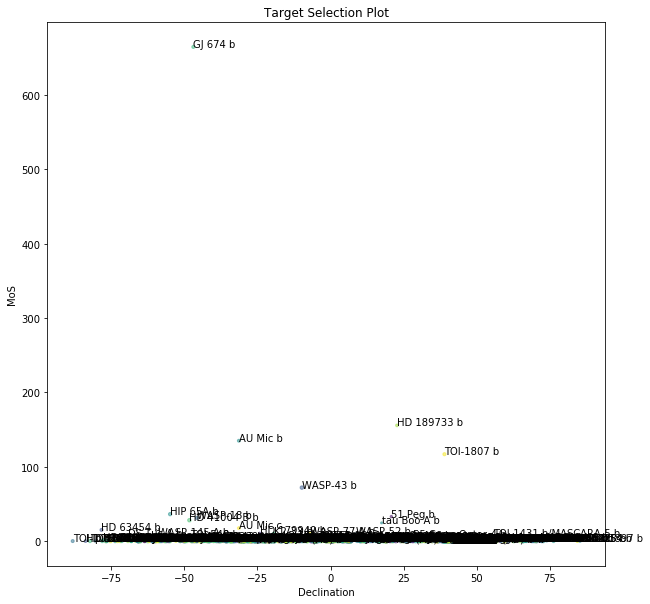

In [51]:
#The Plot:
%matplotlib inline

#pd.set_option('max_columns', 99)
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x,
           y,
           s= size,
           alpha= 0.5,
           c= np.random.rand(1581))

#Chart title, axis label
plt.title('Target Selection Plot')
plt.xlabel('Declination')
plt.ylabel('MoS')
#plt.xlim([-80, 100])
#plt.ylim([min(y), max(y)])
#s=df4["radius"]*5
#c= np.random.rand(1851)

#Bubble labels:
for i, label in enumerate(txt):
    plt.annotate(label, (x[i], y[i]))


In [52]:
n = int(input("Enter the size of list : "))

Enter the size of list : 30


In [53]:
Y=[]
X=[]
labels=[]
SIZE=[]
for i in range(n):
    MAX=max(y)
    print(MAX)
    for j in range(len(y)):
        if y[j]== MAX:
            Y.append(y[j])
            X.append(x[j])
            labels.append(txt[j])
            SIZE.append(size[j])
            y[j]=min(y)

664.5944574158948
155.60500476544112
134.96212451055288
116.82286461176949
71.94641350385591
36.21555861790455
32.97049663408971
31.144363418071347
28.059803943895822
24.469880603959126
17.417511992263872
15.03239440858719
10.362621535070708
9.595199866173235
9.422936799524658
8.894139149631524
8.307589779467714
6.412118285394809
6.338232074610358
5.7497213677449865
5.357691294990248
5.007282739834577
4.574895718002959
4.3452391367956125
4.344523615397469
4.043624449966445
3.1513141057176166
2.7549360582479094
2.6097980811783597
2.598466205699188


In [54]:
for i in range(n):
    print(i,Y[i],X[i],labels[i],"\n")

0 664.5944574158948 -46.8952778 GJ 674 b 

1 155.60500476544112 22.7108333 HD 189733 b 

2 134.96212451055288 -31.340833346 AU Mic b 

3 116.82286461176949 38.922500023 TOI-1807 b 

4 71.94641350385591 -9.8063889 WASP-43 b 

5 36.21555861790455 -54.830833361 HIP 65A b 

6 32.97049663408971 20.7686111 51 Peg b 

7 31.144363418071347 -45.6777778 WASP-18 b 

8 28.059803943895822 -48.2397222 HD 41004 B b 

9 24.469880603959126 17.4561111 tau Boo A b 

10 17.417511992263872 -31.340833346 AU Mic c 

11 15.03239440858719 -78.2788889 HD 63454 b 

12 10.362621535070708 -24.1791667 HD 179949 b 

13 9.595199866173235 -7.0606 WASP-77 A b 

14 9.422936799524658 -19.319273 K2-33 b 

15 8.894139149631524 8.7614 WASP-52 b 

16 8.307589779467714 -58.83611113 WASP-145 A b 

17 6.412118285394809 55.588055571 TOI-1431 b/MASCARA-5 b 

18 6.338232074610358 -69.195833347 DS Tuc A b 

19 5.7497213677449865 -47.9377778 TOI-540 b 

20 5.357691294990248 28.3338889 55 Cnc e 

21 5.007282739834577 44.027500009 Qat

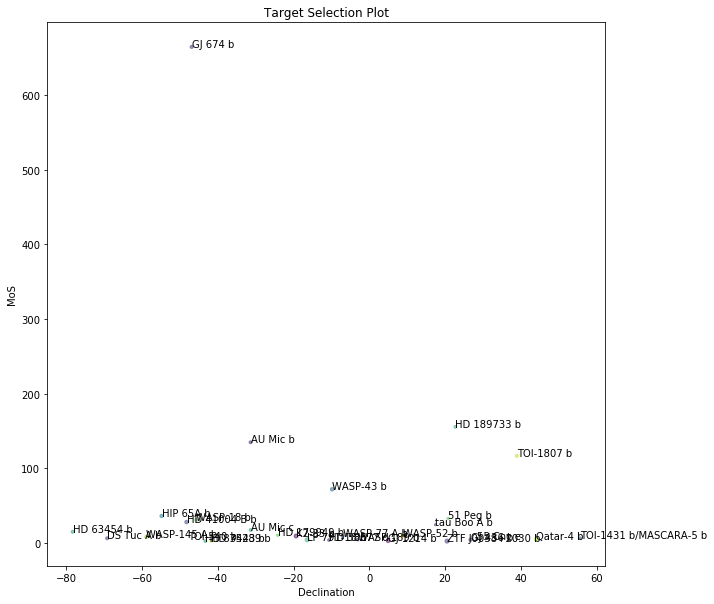

In [55]:
#The Plot:
%matplotlib inline

#pd.set_option('max_columns', 99)
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(X,
           Y,
           s= SIZE,
           alpha= 0.5,
           c= np.random.rand(n))

#Chart title, axis label
plt.title('Target Selection Plot')
plt.xlabel('Declination')
plt.ylabel('MoS')



#s=df4["radius"]*5
#c= np.random.rand(1851)

#Bubble labels:
for i, label in enumerate(labels):
    plt.annotate(label, (X[i], Y[i]))